In [16]:
conda install -c conda-forge cartopy

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/andrewhollyday/opt/anaconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cartopy-0.17.0             |py37h95120c7_1007         1.7 MB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    geos-3.7.2                 |       h6de7cb9_2         736 KB  conda-forge
    matplotlib-base-3.1.1      |   py37h3a684a6_1         6.6 MB  conda-forge
    owslib-0.19.0              |             py_1         125 KB  conda-forge
    proj4-6.1.1                |       hca663e

In [1326]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy
import numpy as np
import pandas as pd
import shapefile
import pyproj
import matplotlib.colors as colors
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [1327]:
df = pd.read_csv('/Users/andrewhollyday/Desktop/DT_model_2', header=None, sep = '\s', names = ['1','2','3','4','5','6','7'])

/Users/andrewhollyday/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [1328]:
df = df.drop(columns="2")
df = df.drop(columns="4")
df = df.drop(columns="6")

In [1329]:
df = df.rename(columns = {"1": "Azimuth", "3": "Elevation", "5": "r", "7": "Surface_Topography_m"})

In [1330]:
df.Azimuth = df.Azimuth*(180/np.pi)
df.Elevation = df.Elevation*(180/np.pi)

In [1331]:
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
	"""
	Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

	e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
	"""
	def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
		self.midpoint = midpoint
		colors.Normalize.__init__(self, vmin, vmax, clip)

	def __call__(self, value, clip=None):
		# I'm ignoring masked values and all kinds of edge cases to make a
		# simple example...
		x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
		return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

/Users/andrewhollyday/opt/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


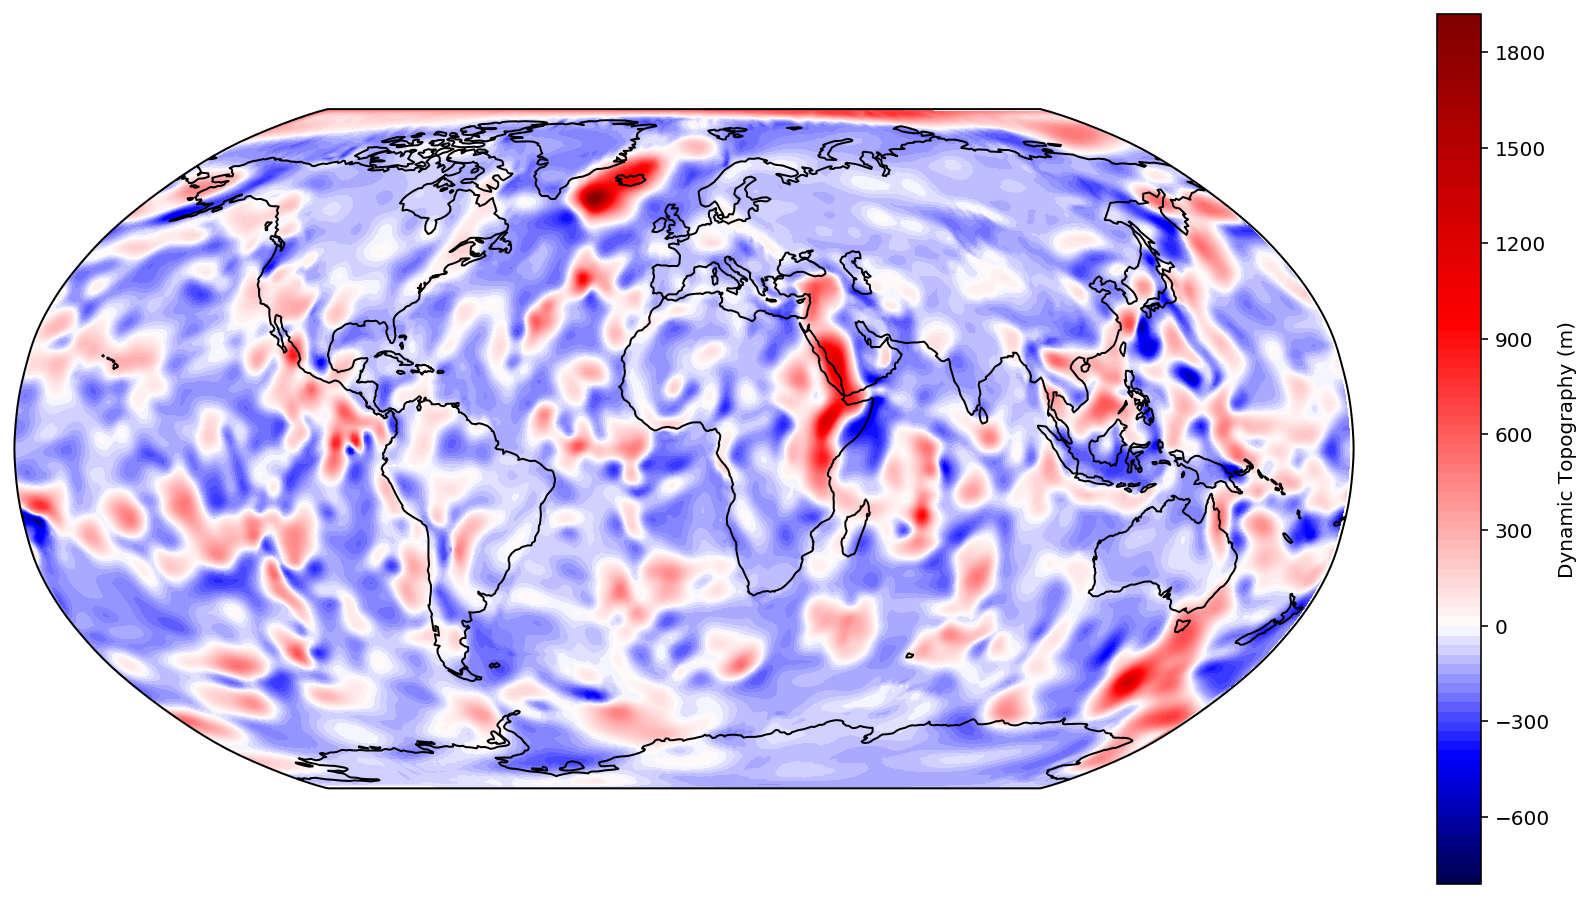

In [1332]:
from scipy.interpolate import griddata

# data coordinates and values
x = df.Azimuth
y = df.Elevation
z = df.Surface_Topography_m

# target grid to interpolate to
xi = np.arange(-180,180,1)
yi = np.arange(-90,90,1)
xi,yi = np.meshgrid(xi,yi)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='linear')

# plot
fig, ax = plt.subplots(figsize=(15,8),subplot_kw={'projection': ccrs.Robinson()})

#fig = plt.figure()
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
map1 = ax.contourf(xi,yi,zi,100,transform=ccrs.PlateCarree(), cmap = 'seismic', cbar_kwargs={}, norm = MidpointNormalize(midpoint=0.))
cbar = fig.colorbar(map1, label='Dynamic Topography (m)')
#ax.set_aspect('auto')
#extent = [-121, -70, 22, 49]
#ax.set_extent(extent)

#ax.colorbar()#cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
#sm = plt.cm.ScalarMappable(cmap='PRGn')
#sm._A = []
#sm.set_array(zi)
#cb = plt.colorbar(sm)
#cb.set_ticks([max(zi), min(zi)])

Text(-66.391667, -47.629167, '~177 masl')

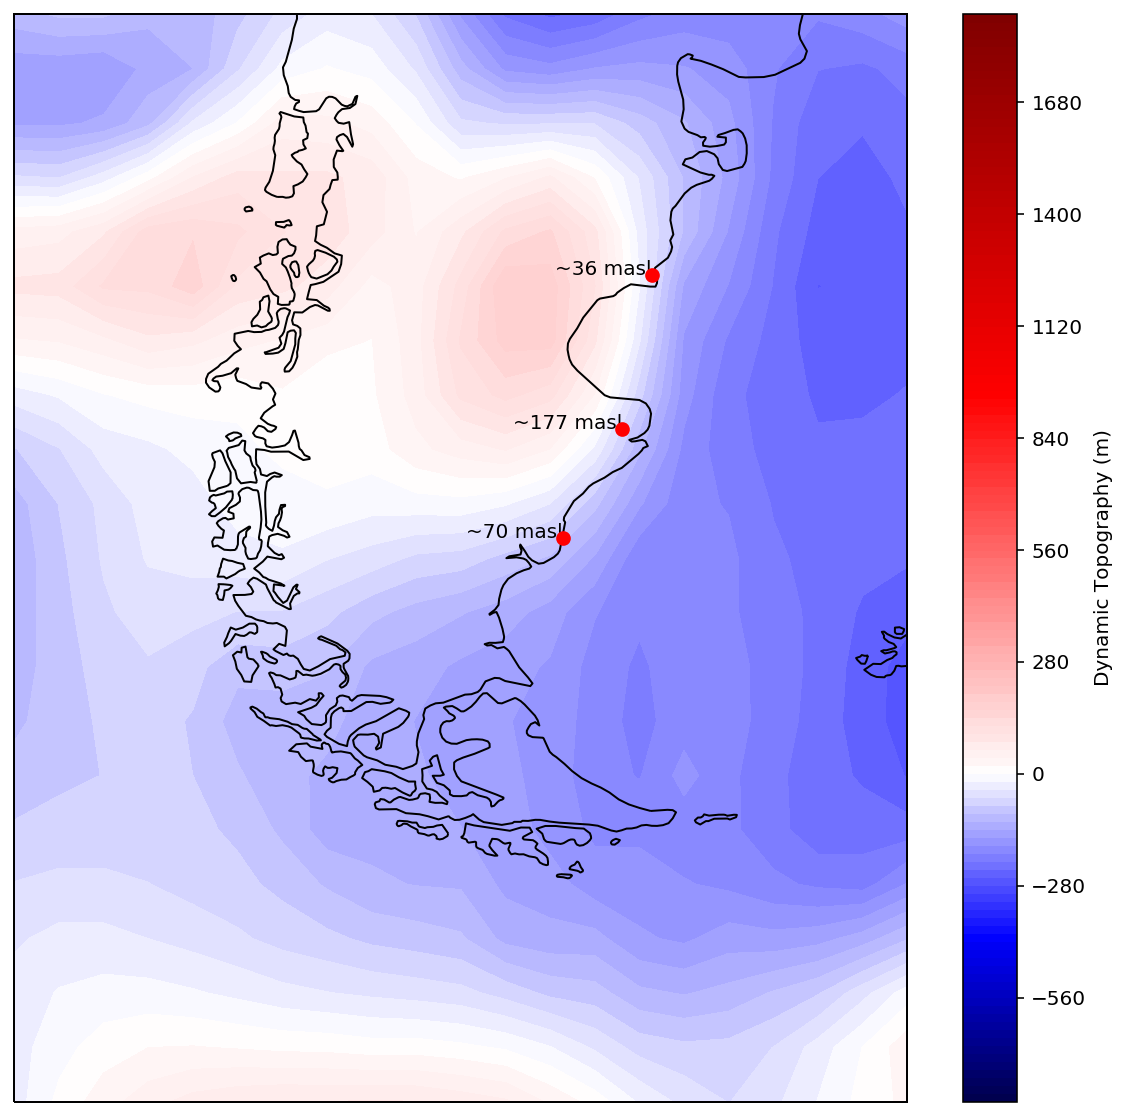

In [1333]:
# data coordinates and values
x = df.Azimuth
y = df.Elevation
z = df.Surface_Topography_m

# target grid to interpolate to
xi = np.arange(-180,180,1)
yi = np.arange(-90,90,1)
xi,yi = np.meshgrid(xi,yi)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='linear')

# plot
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})

#fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution='50m')
map2 = ax.contourf(xi,yi,zi,170,transform=ccrs.PlateCarree(), cmap = 'seismic', cbar_kwargs={}, norm = MidpointNormalize(midpoint=0.))
extent = [-80, -60, -60, -40]
ax.set_extent(extent)
cbar = fig.colorbar(map2, label='Dynamic Topography (m)')
ax.set_aspect('auto')


#ax.colorbar()#cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
#sm = plt.cm.ScalarMappable(cmap='PRGn')
#sm._A = []
#sm.set_array(zi)
#cb = plt.colorbar(sm)
#cb.set_ticks([max(zi), min(zi)])
camarones_lat = -44.79008307
camarones_lon = -65.72760471
canadon_lat = -49.627778
canadon_lon = -67.714722
cerro_lat = -47.629167
cerro_lon = -66.391667

ax.scatter(camarones_lon, camarones_lat, zorder=5, c='r', s=40)
ax.scatter(canadon_lon, canadon_lat, zorder=5, c='r', s=40)
ax.scatter(cerro_lon, cerro_lat, zorder=5, c='r', s=40)
ax.text(camarones_lon,camarones_lat,'~36 masl',horizontalalignment='right')
ax.text(canadon_lon,canadon_lat,'~70 masl',horizontalalignment='right')
ax.text(cerro_lon,cerro_lat,'~177 masl',horizontalalignment='right')




In [1334]:
ds = pd.read_csv('/Users/andrewhollyday/Desktop/solution5_output.csv', header=None)
ds.columns = ['vel_0', 'vel_1', 'vel_2', 'grav_0', 'grav_1', 'grav_2', 'p', 'T', 'geoid', 'heat_flux','DT', 'strain_rate', 'density', 'viscosity', 'non_ad_T', 'azimuth','elevation','r']
ds_u = ds
ds_u.azimuth = ds_u.azimuth*(180/np.pi)
ds_u.elevation = ds_u.elevation*(180/np.pi)
ds_u['r'] = (((max(ds_u['r'])) + 25000) - ds_u['r'])/1000
ds_u['r_again'] = ds_u['r']
ds_u['r_rounded'] = ds_u['r'].round(0)
ds_u['depth_round_2'] = ds_u['r_rounded']
ds_u

,vel_0,vel_1,vel_2,grav_0,grav_1,grav_2,p,T,geoid,heat_flux,...,strain_rate,density,viscosity,non_ad_T,azimuth,elevation,r,r_again,r_rounded,depth_round_2
0,0.025775,-0.006974,-0.014733,-1.7860,-10.3740,1.7860,-9.450900e+10,1715.8,0.000,0.0,...,0.0,3296.1,150030000000000000000.000000,1715.8,-99.768453,9.629472,2880.069341,2880.069341,2880.0,2880.0
1,0.017330,-0.005607,-0.008437,-2.2206,-10.2050,2.2206,-9.450700e+10,1712.1,0.000,0.0,...,0.0,3296.2,155630000000000000000.000000,1712.1,-102.276290,12.003810,2880.103091,2880.103091,2880.0,2880.0
2,0.017030,-0.007020,-0.009487,-2.6472,-9.9993,2.6472,-9.450500e+10,1711.1,0.000,0.0,...,0.0,3296.2,157320000000000000000.000000,1711.1,-104.828244,14.355171,2880.082200,2880.082200,2880.0,2880.0
3,0.016706,-0.005682,-0.014718,-2.3285,-10.3330,1.3463,-9.450600e+10,1712.8,0.000,0.0,...,0.0,3296.2,154580000000000000000.000000,1712.8,-102.699362,7.243791,2880.116931,2880.116931,2880.0,2880.0
4,0.007850,-0.003658,-0.008563,-2.7797,-10.1530,1.7893,-9.450500e+10,1714.2,0.000,0.0,...,0.0,3296.1,152530000000000000000.000000,1714.2,-105.311877,9.647234,2880.026563,2880.026563,2880.0,2880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4246582,0.000250,0.001016,0.001622,8.7814,3.0127,-3.2412,1.181400e+07,1041.3,22.509,0.0,...,0.0,3364.5,1883599999999999911919616.000000,1041.3,18.935911,-19.245022,25.074706,25.074706,25.0,25.0
4246583,0.000257,0.001018,0.001619,8.7138,3.1059,-3.3341,1.192300e+07,1041.1,22.922,0.0,...,0.0,3364.6,1883599999999999911919616.000000,1041.1,19.618075,-19.819699,25.046973,25.046973,25.0,25.0
4246584,0.000214,0.001004,0.001635,8.8637,3.0106,-3.0106,9.202900e+06,1041.0,23.316,0.0,...,0.0,3364.6,1883599999999999911919616.000000,1041.0,18.760586,-17.828499,25.037422,25.037422,25.0,25.0
4246585,0.000221,0.001006,0.001633,8.7992,3.1039,-3.1039,8.636100e+06,1041.7,23.840,0.0,...,0.0,3364.5,1883599999999999911919616.000000,1041.7,19.429514,-18.399566,25.090578,25.090578,25.0,25.0


In [1335]:
gb = ds_u.groupby('r_rounded')
gb

In [1336]:
ds_1 = gb.aggregate(np.mean)
ds_1 

,vel_0,vel_1,vel_2,grav_0,grav_1,grav_2,p,T,geoid,heat_flux,DT,strain_rate,density,non_ad_T,azimuth,elevation,r,r_again,depth_round_2
r_rounded,,,,,,,,,,,,,,,,,,,
25.0,1.600806e-18,-2.567280e-18,-3.949615e-18,-2.595750e-14,-1.038866e-14,2.604045e-14,1.797475e+05,1021.424298,-0.10904,0.0,-435.008405,0.0,3366.825528,1021.424298,-1.399740e-01,-9.185624e-14,25.073944,25.073944,25.0
70.0,-1.427234e-05,-3.320213e-06,1.832791e-06,3.129218e-14,-1.044533e-14,-1.466954e-15,-1.455105e+09,1351.997070,-0.10904,0.0,0.000000,0.0,3328.099494,1351.997070,-2.018229e-01,-3.348970e-14,69.683011,69.683011,70.0
114.0,-4.190337e-05,-5.399721e-06,1.659942e-05,1.977802e-14,-6.840186e-14,4.500628e-14,-2.910390e+09,1650.517005,-0.05452,0.0,0.000000,0.0,3294.387193,1650.517005,-1.692709e-01,-3.783696e-13,114.294196,114.294196,114.0
159.0,-9.098767e-04,-6.504260e-04,5.653947e-04,-1.676474e-14,6.590512e-15,9.646645e-15,-4.362930e+09,1657.464145,0.00000,0.0,0.000000,0.0,3293.741674,1657.464145,-1.725261e-01,-3.902206e-13,158.902260,158.902260,159.0
203.0,-2.504599e-03,-2.170814e-03,1.536726e-03,-4.352614e-15,-9.713272e-15,3.493353e-15,-5.815455e+09,1628.989609,0.00000,0.0,0.000000,0.0,3296.906240,1628.989609,-8.272060e-02,-1.600363e-14,203.479858,203.479858,203.0
204.0,-2.475782e-03,-2.156573e-03,1.676076e-03,2.409762e-14,1.565739e-14,-1.363443e-14,-5.815479e+09,1628.524805,0.00000,0.0,0.000000,0.0,3296.956025,1628.524805,-1.663307e-01,2.214085e-13,203.531613,203.531613,204.0
248.0,-2.997765e-03,-2.767134e-03,2.187759e-03,3.098981e-14,-1.332672e-14,-1.529364e-14,-7.275748e+09,1592.523828,0.00000,0.0,0.000000,0.0,3300.781349,1592.523828,-1.367188e-01,-2.030709e-13,248.121011,248.121011,248.0
293.0,-3.092258e-03,-2.993687e-03,2.500884e-03,9.114619e-14,3.852930e-14,-1.609955e-14,-8.736026e+09,1595.386282,0.00000,0.0,0.000000,0.0,3300.472420,1595.386282,-1.334636e-01,-1.203214e-13,292.731803,292.731803,293.0
337.0,-2.902314e-03,-2.970947e-03,2.756093e-03,-2.906025e-14,-2.837819e-15,3.852948e-14,-1.019997e+10,1626.986943,0.00000,0.0,0.000000,0.0,3297.297874,1626.986943,-1.269531e-01,-1.173929e-14,337.340235,337.340235,337.0


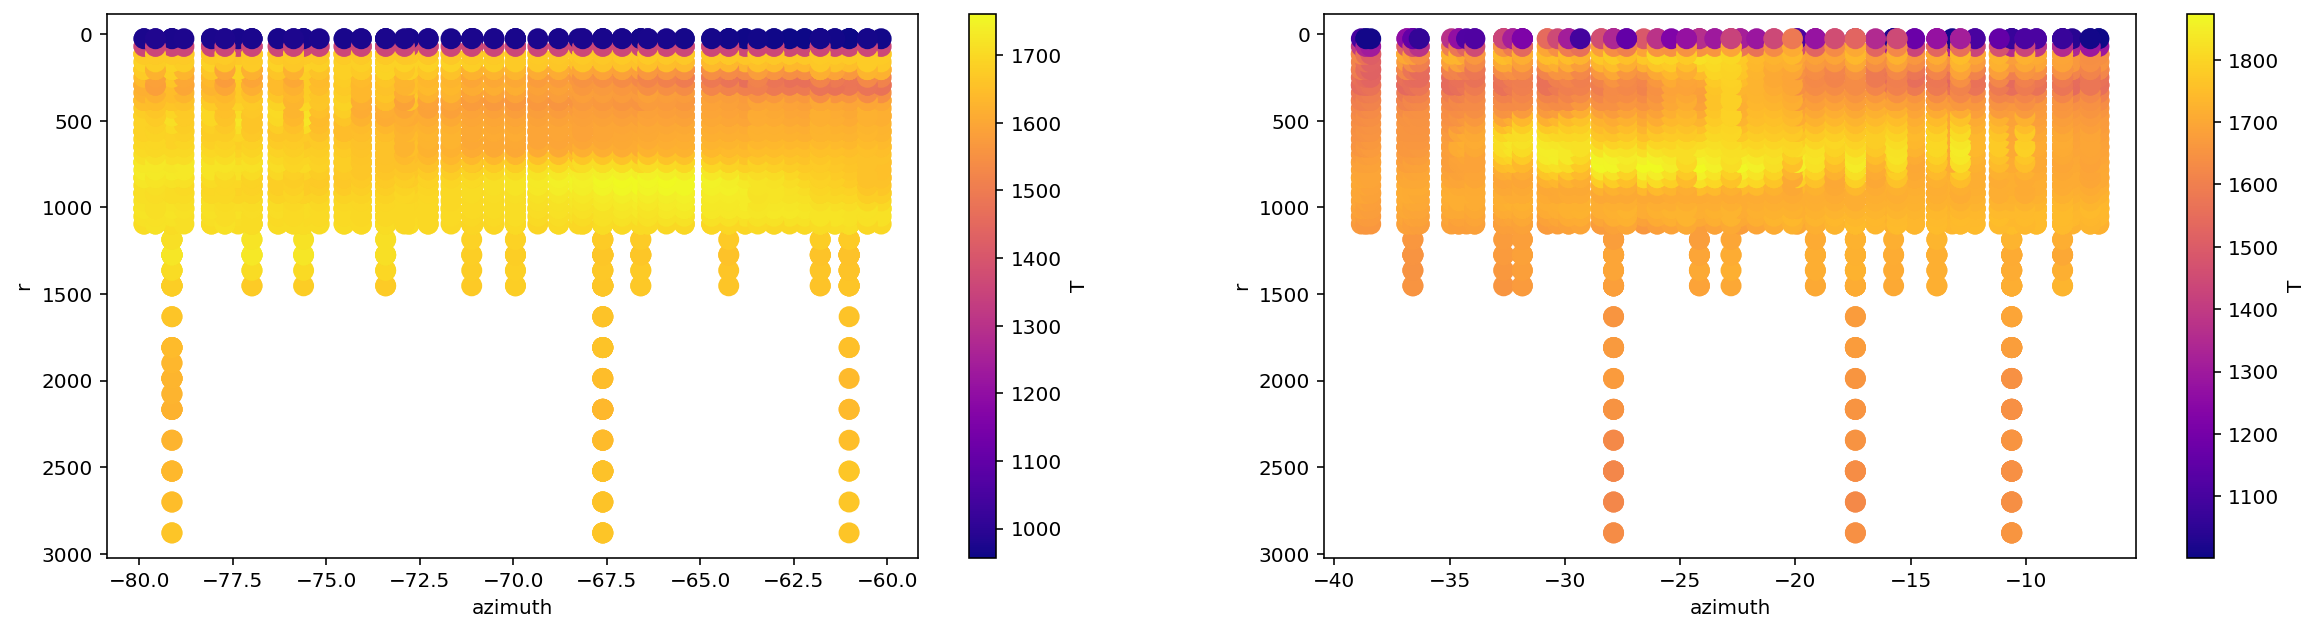

In [1337]:
ds_a = ds.loc[ds['elevation']>62]
ds_b = ds_a.loc[ds['elevation']<65]
ds_c = ds_b.loc[ds['azimuth']>-40]
ds_d = ds_c.loc[ds['azimuth']<-6]
#ds_d.plot.scatter(x= 'azimuth', y = 'r', c = 'T', cmap = 'inferno', figsize=(20,10), s = 90).invert_yaxis()
####################################################################################################################

x = ds_d['azimuth']
y = ds_d['depth_round_2']
depth_z = ds_d['T']
xi = np.arange(-40,-6,1)
yi = np.arange(0,2901,1)
xi,yi = np.meshgrid(xi,yi)
zi = griddata((x,y),depth_z,(xi,yi),method='linear')
#fig, ax = plt.subplots(2,2,figsize=(17,8))#,subplot_kw={'projection': ccrs.Robinson()})

####################################################################################################################
ds_a1 = ds.loc[ds['elevation']>47]
ds_b1 = ds_a1.loc[ds['elevation']<50]
ds_c1 = ds_b1.loc[ds['azimuth']>-80]
ds_d1 = ds_c1.loc[ds['azimuth']<-60]

x1 = ds_d1['azimuth']
y1 = ds_d1['depth_round_2']
depth_z1 = ds_d1['T']

xi1 = np.arange(-80,-60,1)
yi1 = np.arange(0,2901,1)
xi1,yi1 = np.meshgrid(xi1,yi1)
zi1 = griddata((x1,y1),depth_z1,(xi1,yi1),method='linear')

####################################################################################################################
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,5))

ds_d1.plot.scatter(ax=ax1,x= 'azimuth', y = 'r', c = 'T', cmap = 'plasma', s = 90).invert_yaxis()
ds_d.plot.scatter(ax=ax2,x= 'azimuth', y = 'r', c = 'T', cmap = 'plasma', s = 90).invert_yaxis()




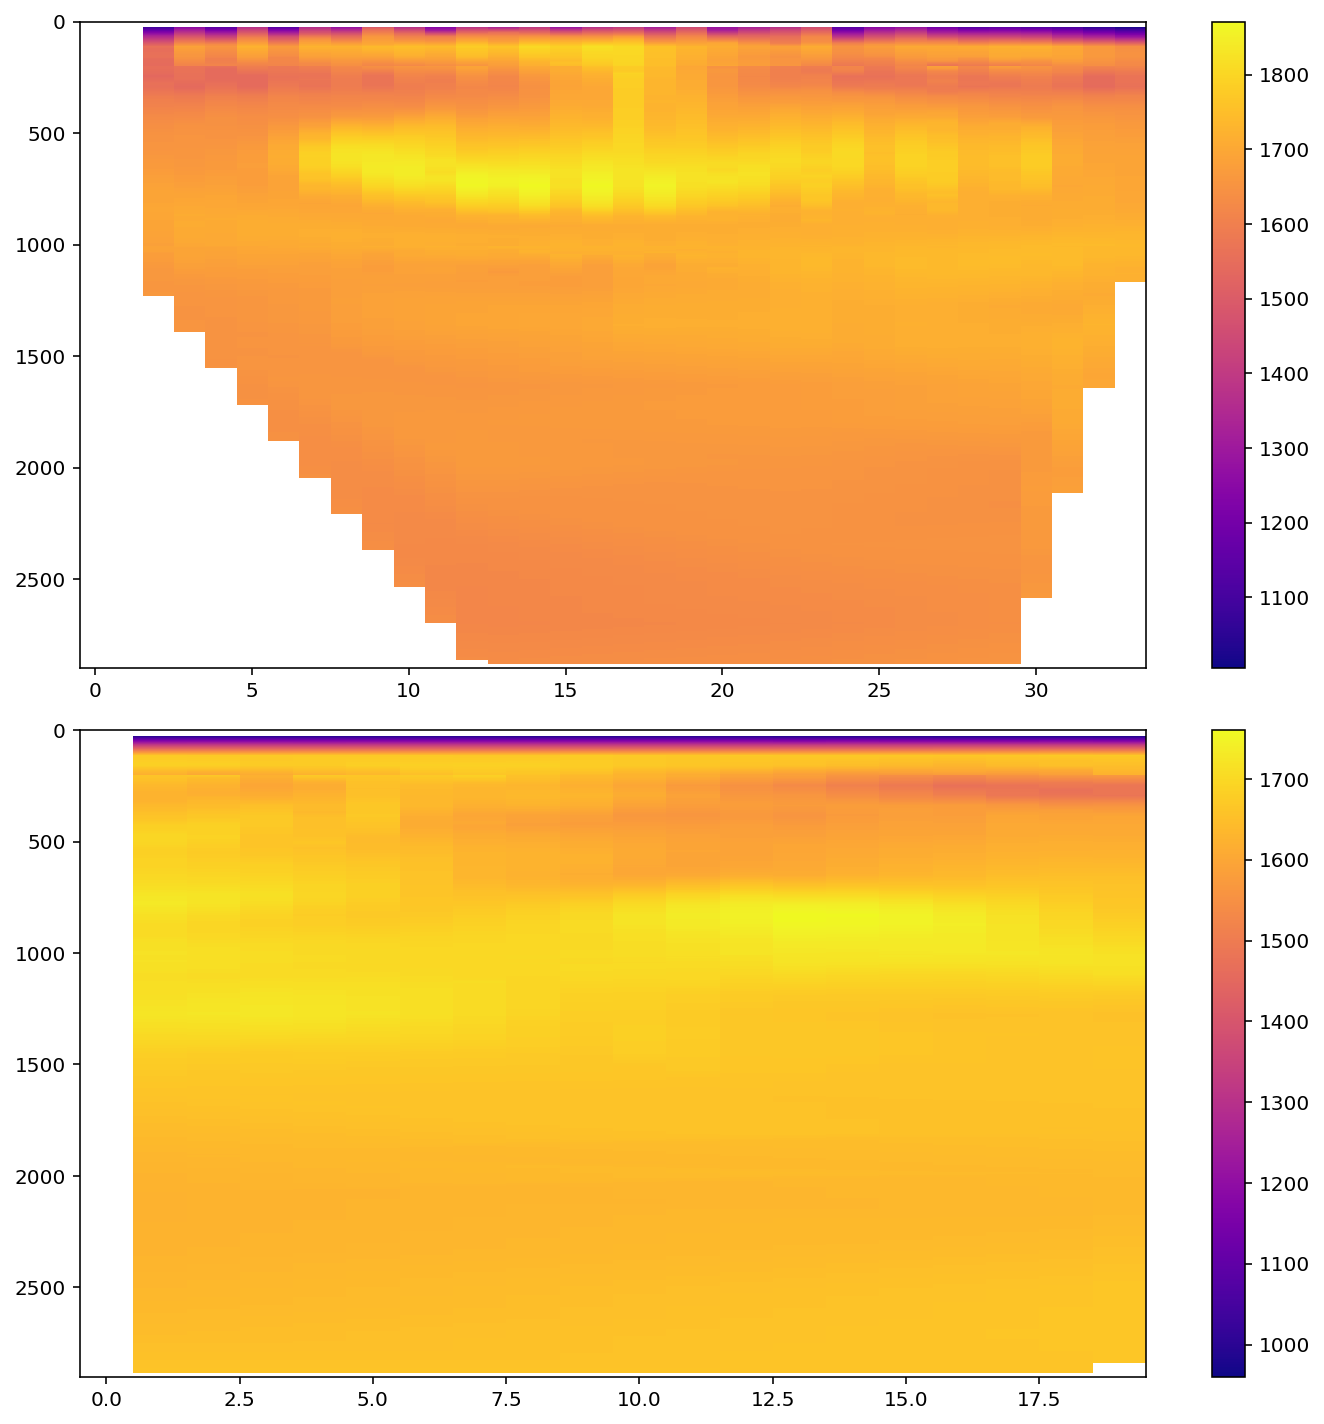

In [1338]:
fig, (ax_a, ax_b) = plt.subplots(2,1,figsize=(10,10), sharey = True)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

im1 = ax_a.imshow(zi, cmap='plasma')
fig.colorbar(im1, ax=ax_a)
cmap = plt.get_cmap('plasma')

im2 = ax_b.imshow(zi1, cmap = 'plasma')
fig.colorbar(im2, ax = ax_b)
cmap = plt.get_cmap('plasma')
#ax_a.contourf(xi,yi,zi,30, cmap = 'inferno', cbar_kwargs={})#,transform=ccrs.PlateCarree(), cma
#ax_b.contourf(xi1,yi1,zi1,30, cmap = 'inferno', cbar_kwargs={})#,transform=ccrs.PlateCarree(), cma

ax_a.set_aspect('auto')
ax_b.set_aspect('auto')
plt.tight_layout(h_pad=1)


/Users/andrewhollyday/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  """
/Users/andrewhollyday/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  import sys


Text(0.5, 1, 'Mantle Temperature Cross Section at 64˚N')

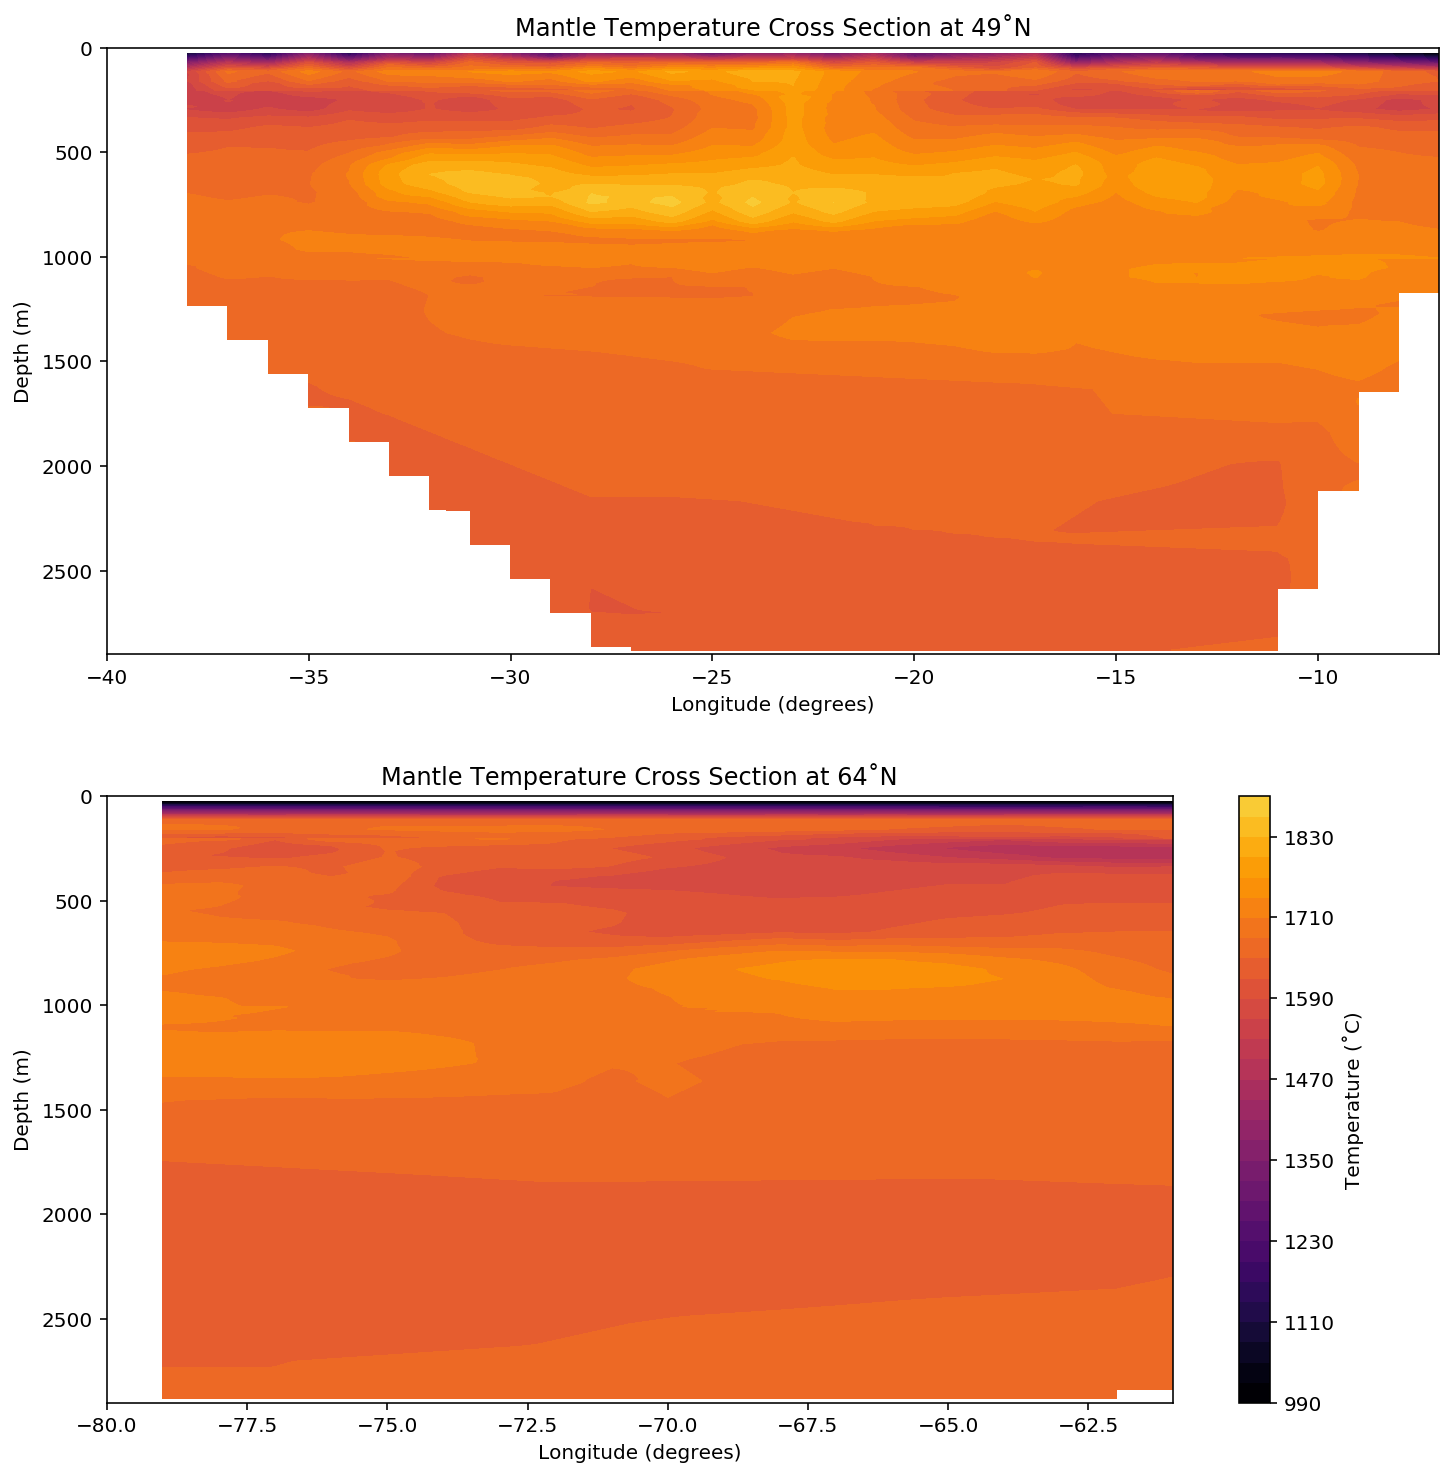

In [1339]:
fig, (ax_a, ax_b) = plt.subplots(2,1,figsize=(10,10), sharey = True)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

ax_a.invert_yaxis()
CS = ax_a.contourf(xi,yi,zi,30, cmap = plt.cm.inferno, cbar_kwargs={},vmin=1000,vmax=2000)
cbar = fig.colorbar(CS, label='Temperature (˚C)')
CS1 = ax_b.contourf(xi1,yi1,zi1,30, cmap =plt.cm.inferno, cbar_kwargs={},vmin=1000,vmax=2000)

ax_a.set_aspect('auto')
ax_b.set_aspect('auto')
plt.tight_layout(h_pad=5)

ax_a.set_ylabel("Depth (m)")
ax_a.set_xlabel("Longitude (degrees)")
ax_a.set_title('Mantle Temperature Cross Section at 49˚N')

ax_b.set_ylabel("Depth (m)")
ax_b.set_xlabel("Longitude (degrees)")
ax_b.set_title('Mantle Temperature Cross Section at 64˚N')

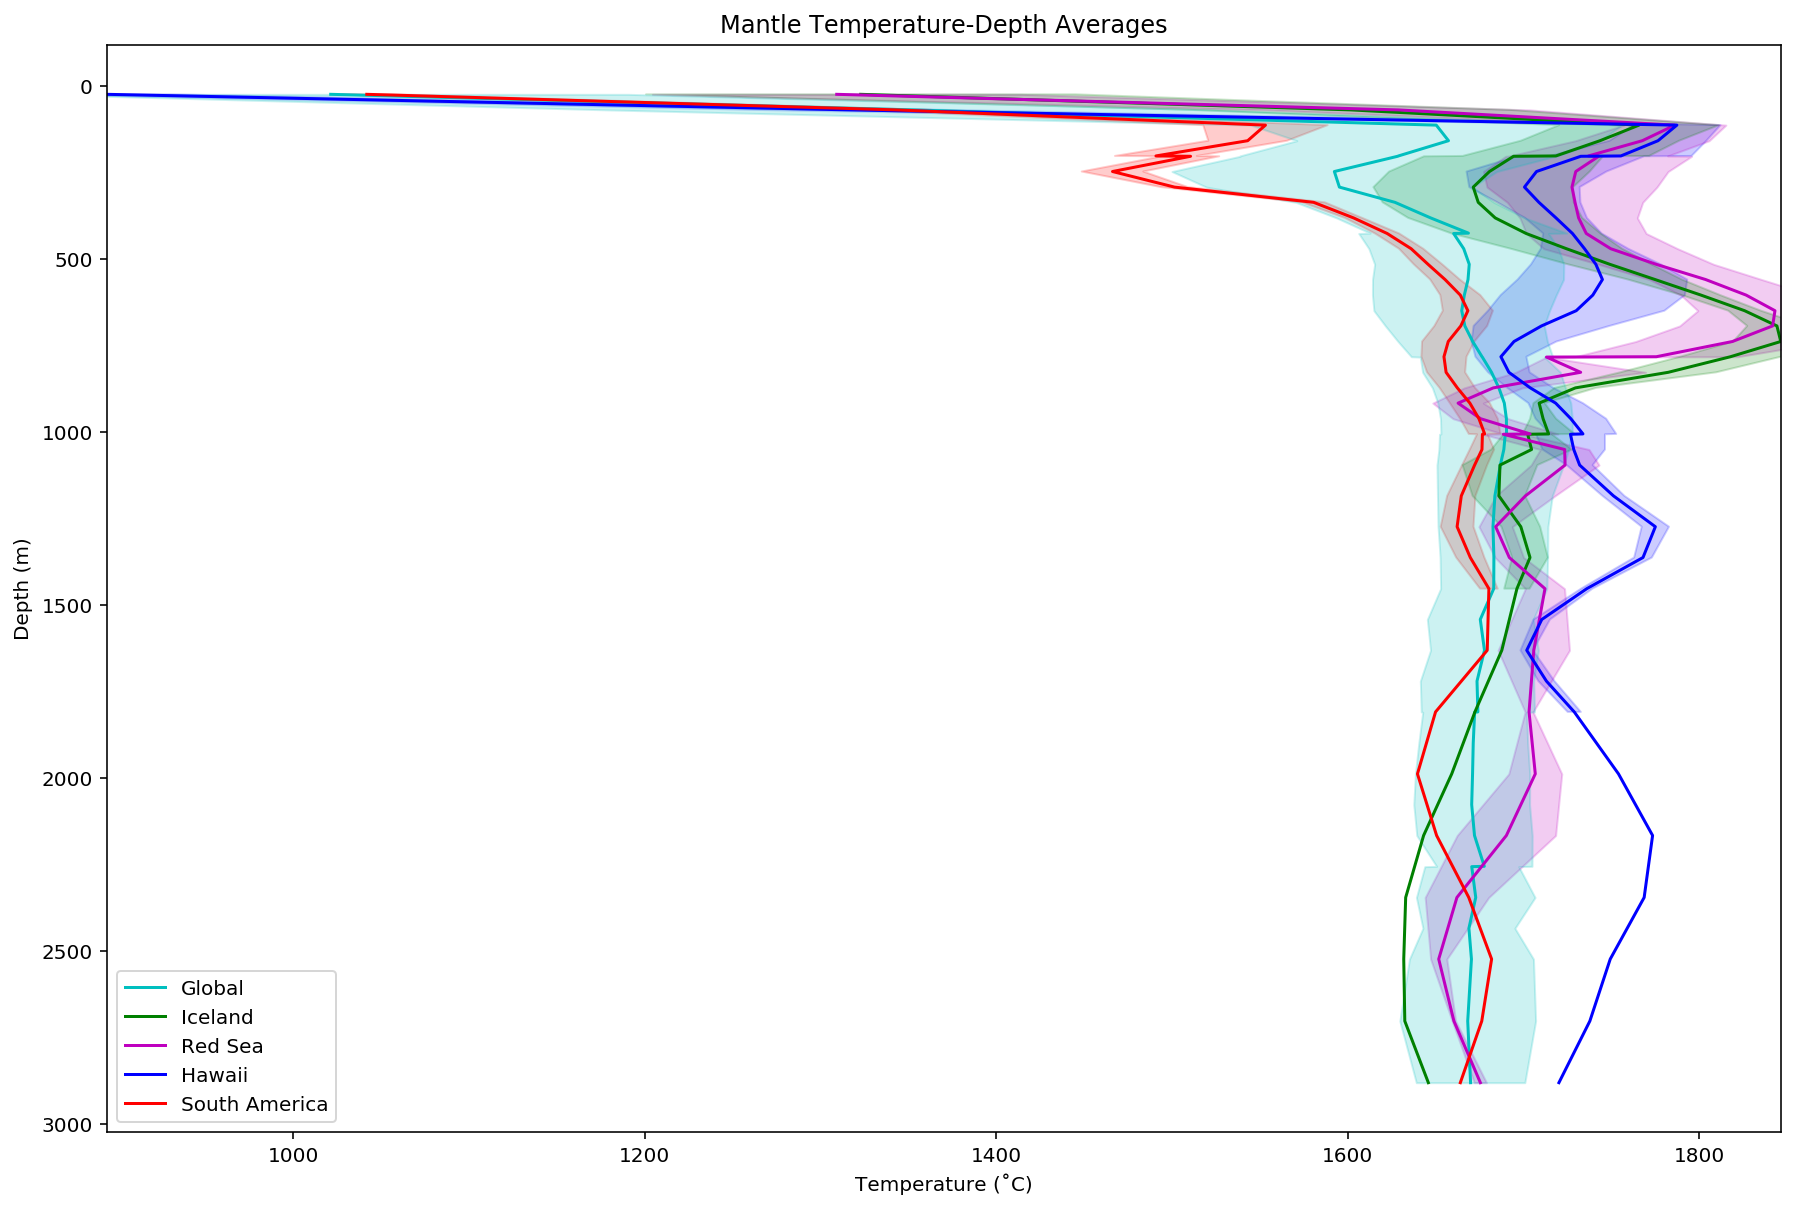

In [1340]:
ds_v = ds_u.loc[ds_u['elevation']>60]
ds_t = ds_v.loc[ds_v['elevation']<65]
ds_w = ds_t.loc[ds_t['azimuth']>-27]
ds_o = ds_w.loc[ds_w['azimuth']<-19]
gb_6 = ds_o.groupby('r_rounded')
ds_6 = gb_6.aggregate(np.mean)
ds_6_std = gb_6.aggregate(np.std)

gb = ds_u.groupby('r_rounded')
ds_1 = gb.aggregate(np.mean)
ds_1_std = gb.aggregate(np.std)
std_plus_glob = ds_1+ds_1_std
std_minus_glob = ds_1-ds_1_std
ds_1['std_plus'] = std_plus_glob['T']
ds_1['std_minus'] = std_minus_glob['T']

std_plus = ds_6+ds_6_std
std_minus = ds_6-ds_6_std
ds_6['std_plus'] = std_plus['T']
ds_6['std_minus'] = std_minus['T']

ds_v_rs = ds_u.loc[ds_u['elevation']>15]
ds_t_rs = ds_v_rs.loc[ds_v_rs['elevation']<18]
ds_w_rs = ds_t_rs.loc[ds_t_rs['azimuth']>35]
ds_o_rs = ds_w_rs.loc[ds_w_rs['azimuth']<43]
gb_6_rs = ds_o_rs.groupby('r_rounded')
ds_6_rs = gb_6_rs.aggregate(np.mean)
ds_6_rs_std = gb_6_rs.aggregate(np.std)

std_plus_rs = ds_6_rs+ds_6_rs_std
std_minus_rs = ds_6_rs-ds_6_rs_std
ds_6_rs['std_plus'] = std_plus_rs['T']
ds_6_rs['std_minus'] = std_minus_rs['T']

ds_v_hw = ds_u.loc[ds_u['elevation']>17]
ds_t_hw = ds_v_hw.loc[ds_v_hw['elevation']<20]
ds_w_hw = ds_t_hw.loc[ds_t_hw['azimuth']>-157]
ds_o_hw = ds_w_hw.loc[ds_w_hw['azimuth']<-153]
gb_6_hw = ds_o_hw.groupby('r_rounded')
ds_6_hw = gb_6_hw.aggregate(np.mean)
ds_6_hw_std = gb_6_hw.aggregate(np.std)

std_plus_hw = ds_6_hw+ds_6_hw_std
std_minus_hw = ds_6_hw-ds_6_hw_std
ds_6_hw['std_plus'] = std_plus_hw['T']
ds_6_hw['std_minus'] = std_minus_hw['T']

ds_v_sa = ds_u.loc[ds_u['elevation']>-50]
ds_t_sa = ds_v_sa.loc[ds_v_sa['elevation']<-45]
ds_w_sa = ds_t_sa.loc[ds_t_sa['azimuth']>-65]
ds_o_sa = ds_w_sa.loc[ds_w_sa['azimuth']<-60]
gb_6_sa = ds_o_sa.groupby('r_rounded')
ds_6_sa_m = gb_6_sa.aggregate(np.mean)
ds_6_sa_std = gb_6_sa.aggregate(np.std)

std_plus_sa = ds_6_sa_m+ds_6_sa_std
std_minus_sa = ds_6_sa_m-ds_6_sa_std
ds_6_sa_m['std_plus'] = std_plus_sa['T']
ds_6_sa_m['std_minus'] = std_minus_sa['T']

fig, ax = plt.subplots(1, 1)

ds_1.plot(ax=ax, x = 'T', y = 'depth_round_2', figsize=(15,10), c = 'c').invert_yaxis()
ds_6.plot(ax=ax, x = 'T', y = 'depth_round_2', figsize=(15,10), c='g')
ds_6_rs.plot(ax=ax, x = 'T', y = 'depth_round_2', figsize=(15,10), c = 'm')
ds_6_hw.plot(ax=ax, x = 'T', y = 'depth_round_2', figsize=(15,10), c = 'b')
ds_6_sa_m.plot(ax=ax, x = 'T', y = 'depth_round_2', figsize=(15,10), c = 'r')
#std_plus_sa.plot(ax=ax, x = 'T', y = 'depth_round_2', figsize=(10,5))


ax.legend(["Global", "Iceland","Red Sea", "Hawaii", "South America"]);
ax.set_ylabel("Depth (m)")
ax.set_xlabel("Temperature (˚C)")
ax.set_title('Mantle Temperature-Depth Averages')
ax.fill_betweenx(ds_6_sa_m['depth_round_2'],ds_6_sa_m['std_plus'], ds_6_sa_m['std_minus'],alpha= .2, color = 'r')
ax.fill_betweenx(ds_6_hw['depth_round_2'],ds_6_hw['std_plus'], ds_6_hw['std_minus'],alpha= .2, color = 'b')
ax.fill_betweenx(ds_6_rs['depth_round_2'],ds_6_rs['std_plus'], ds_6_rs['std_minus'],alpha= .2, color = 'm')
ax.fill_betweenx(ds_6['depth_round_2'],ds_6['std_plus'], ds_6['std_minus'],alpha= .2, color = 'g')
ax.fill_betweenx(ds_1['depth_round_2'],ds_1['std_plus'], ds_1['std_minus'],alpha= .2, color = 'c')

In [1341]:
ds_v_sa = ds_u.loc[ds_u['elevation']>-50]
ds_t_sa = ds_v_sa.loc[ds_v_sa['elevation']<-49]
ds_w_sa = ds_t_sa.loc[ds_t_sa['azimuth']>-60]
ds_o_sa = ds_w_sa.loc[ds_w_sa['azimuth']<-58]
gb_6_sa = ds_o_sa.groupby('r_rounded')
ds_6_sa = gb_6_sa.aggregate(np.mean)

In [1342]:
from mpl_toolkits.mplot3d import Axes3D

In [1343]:
ds_v_sa = ds_u.loc[ds_u['elevation']>0]
ds_t_sa = ds_v_sa.loc[ds_v_sa['elevation']<10]
ds_w_sa = ds_t_sa.loc[ds_t_sa['azimuth']>0]
ds_o_sa = ds_w_sa.loc[ds_w_sa['azimuth']<25]
gb_6_sa = ds_o_sa.groupby('r_rounded')
ds_6_rs = gb_6_sa.aggregate(np.mean)

In [1344]:
len(ds_u)

4246587

In [1345]:
dsU_1 = ds_u.loc[ds_u['elevation']>9]
dsU_2 = dsU_1.loc[dsU_1['elevation']<27]
dsU_3 = dsU_2.loc[dsU_2['azimuth']>35]
dsU_4 = dsU_3.loc[dsU_3['azimuth']<45]
dsU_4

,vel_0,vel_1,vel_2,grav_0,grav_1,grav_2,p,T,geoid,heat_flux,...,strain_rate,density,viscosity,non_ad_T,azimuth,elevation,r,r_again,r_rounded,depth_round_2
3269948,-0.008135,0.013020,-0.004792,8.4630,6.1123,2.2402,-9.447100e+10,1684.7,0.000,0.0,...,0.0,3297.1,204770000000000000000.000000,1684.7,35.839255,12.111411,2880.082233,2880.082233,2880.0,2880.0
3269950,-0.013080,0.022000,-0.007283,8.3045,5.9592,3.0863,-9.446800e+10,1678.6,0.000,0.0,...,0.0,3297.3,217620000000000000000.000000,1678.6,35.661810,16.801300,2880.059804,2880.059804,2880.0,2880.0
3269951,-0.013053,0.017666,-0.003507,8.0539,6.4812,2.6703,-9.447600e+10,1681.3,0.000,0.0,...,0.0,3297.3,211760000000000000000.000000,1681.3,38.823907,14.482883,2880.056897,2880.056897,2880.0,2880.0
3269957,-0.010631,0.009923,-0.006919,8.2936,5.9899,2.1954,-8.833400e+10,1680.2,0.000,0.0,...,0.0,3297.0,6239800000000000262144.000000,1680.2,35.837937,12.111354,2701.621012,2701.621012,2702.0,2702.0
3269959,-0.010213,0.010051,-0.006433,8.1382,5.8399,3.0245,-8.833100e+10,1661.4,0.000,0.0,...,0.0,3297.7,7528800000000000000000.000000,1661.4,35.662784,16.801930,2701.677055,2701.677055,2702.0,2702.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361158,0.012504,-0.009130,-0.003440,6.6043,6.6043,3.2348,-4.383400e+09,1629.9,0.000,0.0,...,0.0,3296.7,147020000000000000000.000000,1629.9,44.999991,19.103215,158.880378,158.880378,159.0,159.0
3361167,-0.000765,0.000133,0.001478,6.5929,6.5929,3.2293,-2.928500e+09,1654.5,0.000,0.0,...,0.0,3293.9,10919000000000000262144.000000,1654.5,44.999991,19.103272,114.279481,114.279481,114.0,114.0
3361257,-0.000765,0.000133,0.001478,6.5929,6.5929,3.2293,-2.928500e+09,1654.5,66.853,0.0,...,0.0,3293.9,10919000000000000262144.000000,1654.5,44.999991,19.103272,114.279481,114.279481,114.0,114.0
3361266,-0.000999,0.000274,0.001541,6.5816,6.5816,3.2237,-1.482800e+09,1366.6,66.853,0.0,...,0.0,3326.4,194309999999999994232832.000000,1366.6,44.999991,19.103272,69.678584,69.678584,70.0,70.0


In [1346]:
a = dsU_4['elevation']
b = dsU_4['azimuth']
c = 3000 - dsU_4['r']
d = dsU_4['vel_0']
e = dsU_4['vel_1']
f = dsU_4['vel_2']

g = dsU_4['T']

In [1348]:
import matplotlib.colors as colors



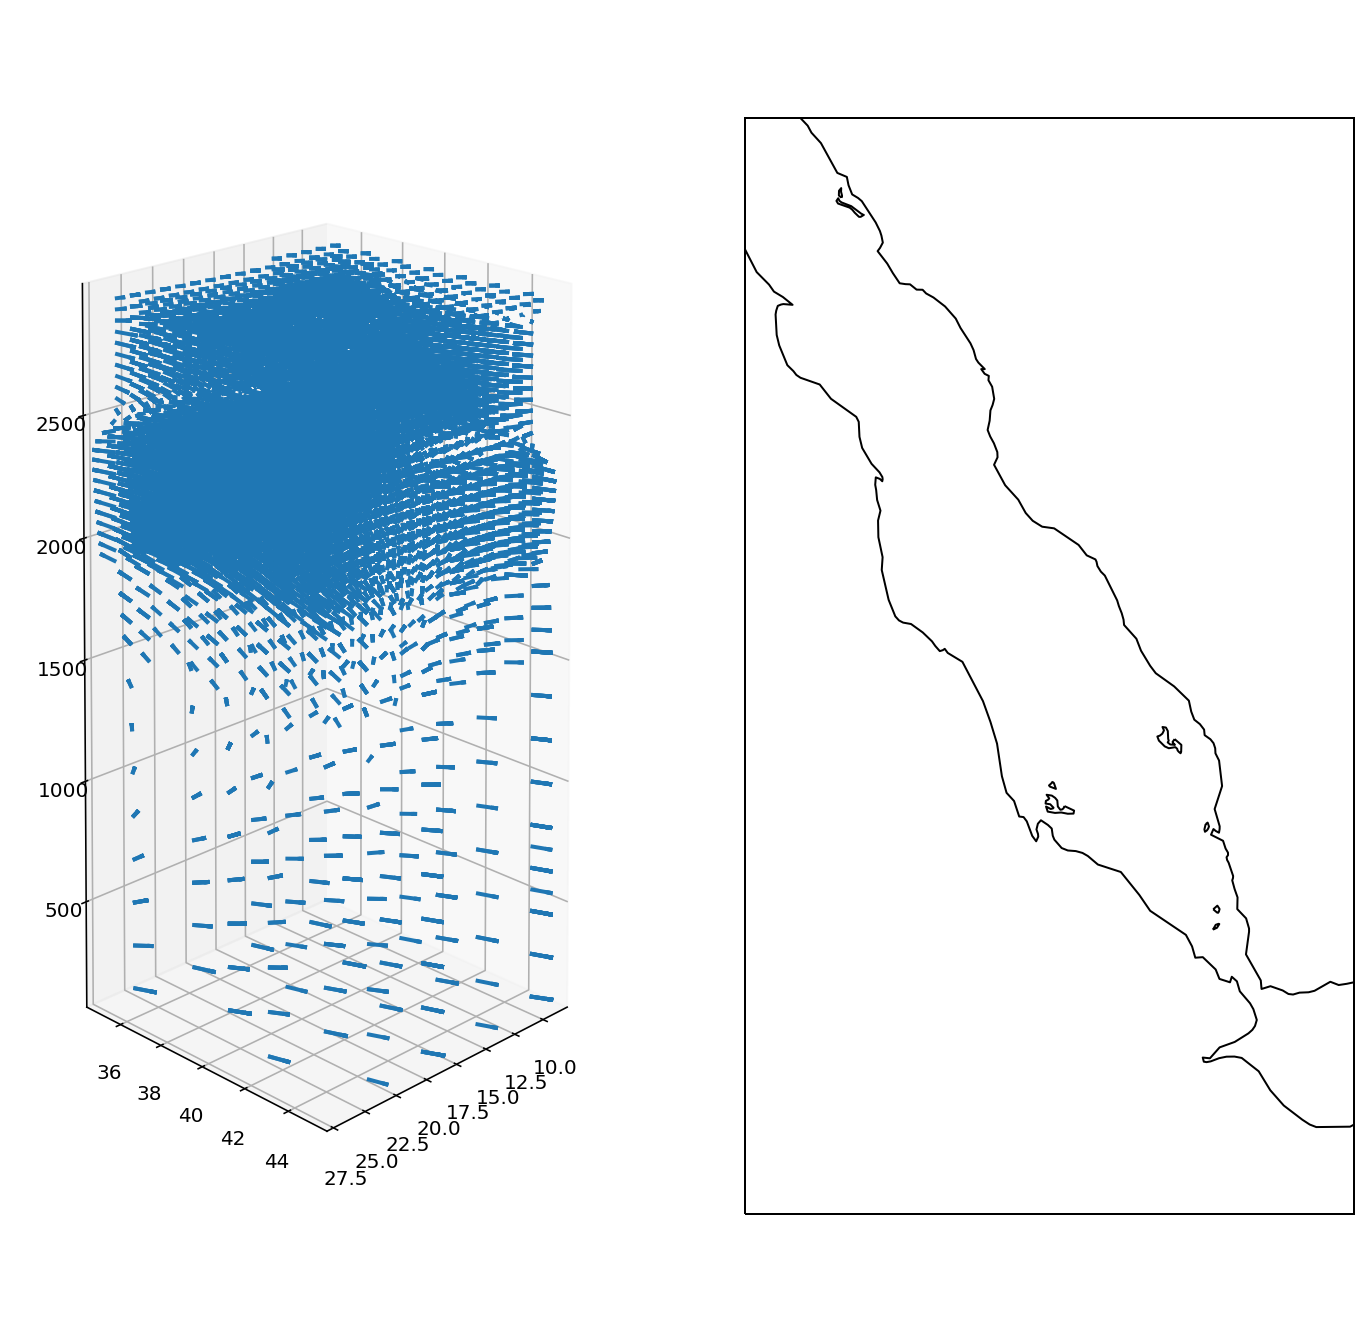

In [1349]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree())

M = ax1.quiver(a,b,c,d,e,f, normalize = True, lw=2,cmap ='Reds')
#M.set_array(np.random.rand(np.prod(x.shape)))
ax2.coastlines(resolution='50m')
extent = [45, 35, 27, 9]
ax2.set_extent(extent)

ax1.view_init(elev = 10, azim=45)

In [1350]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
from numpy import arange,meshgrid,sqrt



In [1035]:
conda install -c conda-forge yt

Solving environment: done

## Package Plan ##

  environment location: /Users/andrewhollyday/opt/anaconda3

  added / updated specs:
    - yt


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    yt-3.5.1                   |   py37h3b54f70_0         8.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         8.8 MB

The following NEW packages will be INSTALLED:

  yt                 conda-forge/osx-64::yt-3.5.1-py37h3b54f70_0



yt-3.5.1             | 8.8 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [1036]:
import yt

In [1042]:
attempt = yt.load("/Users/andrewhollyday/Desktop/output-hopefully-sucessful-again/solution/")

yt : [ERROR    ] 2019-12-03 01:25:35,931 Couldn't figure out output type for /Users/andrewhollyday/Desktop/output-hopefully-sucessful-again/solution/


YTOutputNotIdentified: Supplied ('/Users/andrewhollyday/Desktop/output-hopefully-sucessful-again/solution/',) {}, but could not load!

In [1044]:
git clone https://github.com/yt-project/yt

SyntaxError: invalid syntax (<ipython-input-1044-fb5115b7797e>, line 1)

In [ ]:
#from mayavi import mlab
from mayavi.mlab import *

In [ ]:
ds_v = ds_u.loc[ds_u['elevation']>60]
ds_t = ds_v.loc[ds_v['elevation']<65]
ds_w = ds_t.loc[ds_t['azimuth']>-27]
ds_o = ds_w.loc[ds_w['azimuth']<-19]
gb_6 = ds_o.groupby('r_rounded')
ds_6 = gb_6.aggregate(np.mean)

ds_v_rs = ds_u.loc[ds_u['elevation']>15]
ds_t_rs = ds_v_rs.loc[ds_v_rs['elevation']<18]
ds_w_rs = ds_t_rs.loc[ds_t_rs['azimuth']>35]
ds_o_rs = ds_w_rs.loc[ds_w_rs['azimuth']<43]
gb_6_rs = ds_o_rs.groupby('r_rounded')
ds_6_rs = gb_6_rs.aggregate(np.mean)

ds_v_hw = ds_u.loc[ds_u['elevation']>17]
ds_t_hw = ds_v_hw.loc[ds_v_hw['elevation']<20]
ds_w_hw = ds_t_hw.loc[ds_t_hw['azimuth']>-157]
ds_o_hw = ds_w_hw.loc[ds_w_hw['azimuth']<-153]
gb_6_hw = ds_o_hw.groupby('r_rounded')
ds_6_hw = gb_6_hw.aggregate(np.mean)

ds_v_sa = ds_u.loc[ds_u['elevation']>-50]
ds_t_sa = ds_v_sa.loc[ds_v_sa['elevation']<-45]
ds_w_sa = ds_t_sa.loc[ds_t_sa['azimuth']>-65]
ds_o_sa = ds_w_sa.loc[ds_w_sa['azimuth']<-60]
gb_6_sa = ds_o_sa.groupby('r_rounded')
ds_6_sa_m = gb_6_sa.aggregate(np.mean)
ds_6_sa_std = gb_6_sa.aggregate(np.std)

fig, ax = plt.subplots(1, 1)
x = ds_1['T']
y = np.std
ds_1.plot(ax=ax, x = 'T', y = 'depth_round_2', figsize=(10,5)).invert_yaxis()
ds_6.plot(ax=ax, x = 'T', y = 'depth_round_2', figsize=(10,5))
ds_6_rs.plot(ax=ax, x = 'T', y = 'depth_round_2', figsize=(10,5))
ds_6_hw.plot(ax=ax, x = 'T', y = 'depth_round_2', figsize=(10,5))
ds_6_sa_m.plot(ax=ax, x = 'T', y = 'depth_round_2', figsize=(10,5))
ds_6_sa_std.fill

ax.legend(["Global", "Iceland","Red Sea", "Hawaii", "South America"]);
ax.set_ylabel("Depth (m)")
ax.set_xlabel("Temperature (˚C)")
ax.set_title('Mantle Temperature-Depth Averages')
fig.fill_between(x, y)



In [ ]:
pip install mayavi

In [ ]:
# data coordinates and values
x = ds_d['azimuth']
y = ds_d['depth_round_2']
depth_z = ds_d['T']

# target grid to interpolate to
xi = np.arange(-40,-6,1)
yi = np.arange(0,2901,1)
xi,yi = np.meshgrid(xi,yi)

# interpolate
zi = griddata((x,y),depth_z,(xi,yi),method='linear')

# plot
fig, ax = plt.subplots(2,2,figsize=(17,8))#,subplot_kw={'projection': ccrs.Robinson()})

ax[0,0].contourf(xi,yi,zi,30, cmap = 'inferno', cbar_kwargs={})#,transform=ccrs.PlateCarree(), cma
ax[0,0].invert_yaxis()
sm = plt.cm.ScalarMappable(cmap='inferno')
sm.set_array(zi)
cb = plt.colorbar(sm)

ax[0,0].ds_d.plot.scatter(x= 'azimuth', y = 'r', c = 'T', cmap = 'inferno', figsize=(20,10), s = 90)#.invert_yaxis()

In [ ]:
# data coordinates and values
x = ds_d['azimuth']
y = ds_d['depth_round_2']
depth_z = ds_d['T']

# target grid to interpolate to
xi = np.arange(-80,-60,1)
yi = np.arange(0,2901,1)
xi,yi = np.meshgrid(xi,yi)

# interpolate
zi = griddata((x,y),depth_z,(xi,yi),method='linear')

# plot
fig, ax = plt.subplots(figsize=(17,8))#,subplot_kw={'projection': ccrs.Robinson()})

ax.contourf(xi,yi,zi,30, cmap = 'inferno', cbar_kwargs={})#,transform=ccrs.PlateCarree(), cma
ax.invert_yaxis()
sm = plt.cm.ScalarMappable(cmap='inferno')
sm.set_array(zi)
cb = plt.colorbar(sm)

In [ ]:
ds_a = ds.loc[ds['elevation']>17]
ds_b = ds_a.loc[ds['elevation']<20]
ds_c = ds_b.loc[ds['azimuth']>-170]
ds_d = ds_c.loc[ds['azimuth']<-130]
ds_d.plot.scatter(x= 'azimuth', y = 'r', c = 'T', cmap = 'inferno', figsize=(20,10), s = 200).invert_yaxis()

In [ ]:
# data coordinates and values
x = ds_d['azimuth']
y = ds_d['depth_round_2']
depth_z = ds_d['T']

# target grid to interpolate to
xi = np.arange(-170,-130,.5)
yi = np.arange(0,2901,1)
xi,yi = np.meshgrid(xi,yi)

# interpolate
zi = griddata((x,y),depth_z,(xi,yi),method='linear')

# plot
fig, ax = plt.subplots(figsize=(17,8))#,subplot_kw={'projection': ccrs.Robinson()})

ax.contourf(xi,yi,zi,100, cmap = 'inferno', cbar_kwargs={})#,transform=ccrs.PlateCarree(), cma
ax.invert_yaxis()
sm = plt.cm.ScalarMappable(cmap='inferno')
sm.set_array(zi)
cb = plt.colorbar(sm)

In [ ]:
fig, [ax3,ax4] = plt.subplots(1,2,figsize=(15,10), sharey = True)
ax4plot = ax4.contourf(xi,yi,zi,30, cmap = 'inferno', cbar_kwargs={})#,transform=ccrs.PlateCarree(), cma
ax4.invert_yaxis()
#plt.colorbar(ax4plot, cax=ax4)
#sm = plt.cm.ScalarMappable(cmap='inferno')
#sm.set_array(zi)
#cb = plt.colorbar(sm)

#pos_neg_clipped = ax4.imshow(zi1, cmap='inferno', vmin=-1, vmax=1,
                            #interpolation='none')
#cbar = fig.colorbar(pos_neg_clipped, ax=ax4, extend='both')

ax3plot = ax3.contourf(xi1,yi1,zi1,30, cmap = 'inferno', cbar_kwargs={})#,transform=ccrs.PlateCarree(), cma
#ax3.invert_yaxis()
#plt.colorbar(ax3plot,cax=ax3)

#sm = plt.cm.ScalarMappable(cmap='inferno')
#sm.set_array(zi1)
#cb = plt.colorbar(sm)

#cbar_ax = fig.add_axes([0.85, 0.1, 0.05, 0.7])
#fig.colorbar(cax=cbar_ax)

#pos_neg_clipped = ax3.imshow(zi1, cmap='inferno', vmin=-1, vmax=1,
                             #interpolation='none')
#cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
#cbar.minorticks_on()

